# Analyze target statistics

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
# Read target csv
subset_name = 'target_subset_' + Path('.').resolve().name
df = pd.read_csv(f'../../../../data/interim/{subset_name}.csv', index_col=0)
df

,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
1,5ZHE_A,2.180,2021-03-03T00:00:00Z,">5zhe_A mol:protein length:253 Ditrans,polyci...",MMLSATQPLSEKLPAHGCRHVAIIMDGNGRWAKKQGKIRAFGHKAG...,253,52,2,True
2,5ZCT_A,2.050,2019-03-27T00:00:00Z,>5zct_A mol:protein length:306 Ribosomal prot...,MKIAILSRDGTLYSCKRLREAAIQRGHLVEILDPLSCYMNINPAAS...,306,11,9,True
3,6IYB_A,2.096,2020-08-05T00:00:00Z,>6iyb_A mol:protein length:199 Ras-related pr...,GSAMGSTSRKKVLLKVIILGDSGVGKTSLMNQYVNKKFSNQYKATI...,199,20,2,True
4,6PXX_B,1.500,2019-12-11T00:00:00Z,>6pxx_B mol:protein length:265 Beta-lactamase,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,265,447,130,True
...,...,...,...,...,...,...,...,...,...
495,6W2Q_A,1.800,2021-09-01T00:00:00Z,>6w2q_A mol:protein length:220 Junction 34,MSNDEKEKLKELLKRAEELAKSPDPEDLKEAVRLAEEVVRERPGSE...,220,1,1,False
496,6CPB_A,1.160,2021-03-03T00:00:00Z,>6cpb_A mol:protein length:141 Carbon monoxid...,MRLTDTNLLEVLNSEEYSGVLKEFREQRYSKKAILYTPNTERNLVF...,141,2,2,False
497,6X23_A,2.160,2020-01-15T00:00:00Z,>6x23_A mol:protein length:105 mbSHANK1 protein,GPQRNGRAPEGKMDLIIMRGDKGFGFRLSGATHSAAEQTAQGQWVR...,105,1,1,False
498,6E3A_A,1.400,2018-10-10T00:00:00Z,>6e3a_A mol:protein length:182 Probable RNA 2...,MVLIDYSKLSKEVAYALRHAPWEYGLELDAEGWVDINQLLSSLHEC...,182,1,1,False


In [3]:
df['is_similar_AF2'] = ['True' if x == True else 'False' for x in df['is_similar_AF2']]

In [4]:
# Number of sequences included in the AF2 training data in the cluster
df['num_sequence_in_cluster_included_AF2'] = df['num_entry_in_cluster'] - df['num_entry_in_cluster_AF2_notInclude']

## Show target distribution

<AxesSubplot:xlabel='length'>

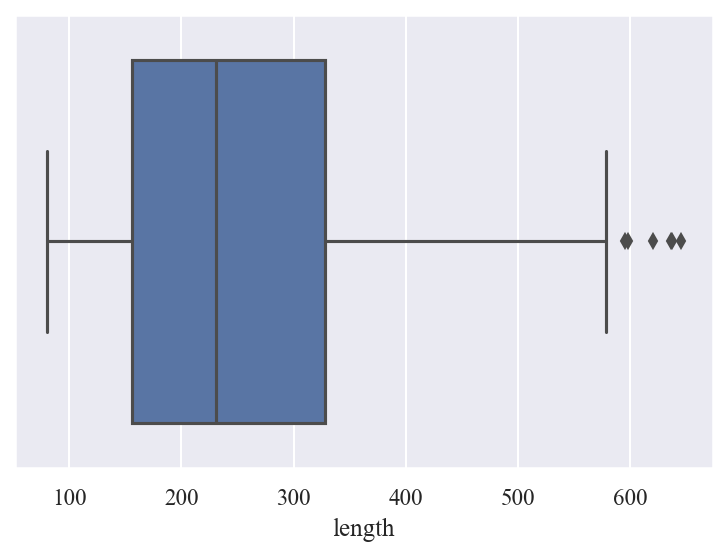

In [5]:
# Sequence length
sns.boxplot(data=df, x='length')

<AxesSubplot:xlabel='length', ylabel='is_similar_AF2'>

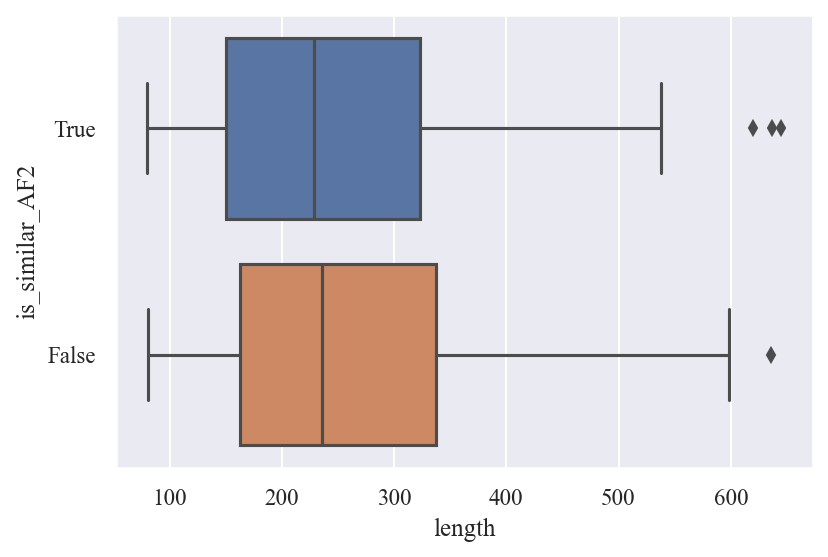

In [6]:
sns.boxplot(data=df, x='length', y='is_similar_AF2')

<AxesSubplot:xlabel='resolution'>

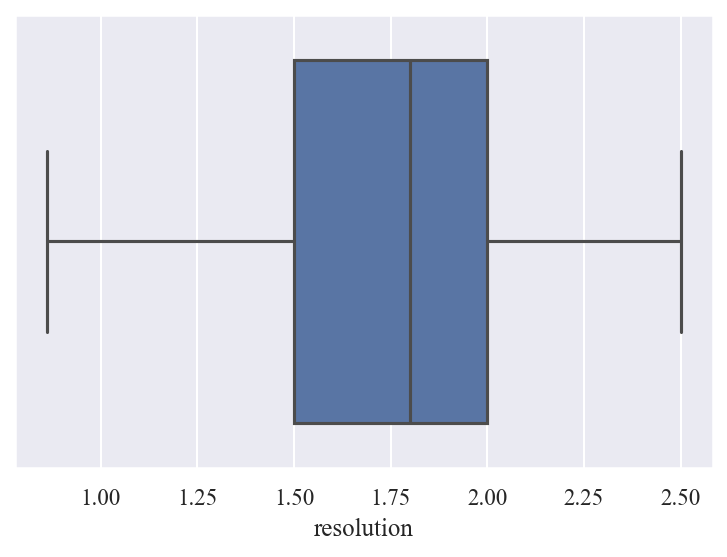

In [7]:
# Resolution
sns.boxplot(data=df, x='resolution')

<AxesSubplot:xlabel='resolution', ylabel='is_similar_AF2'>

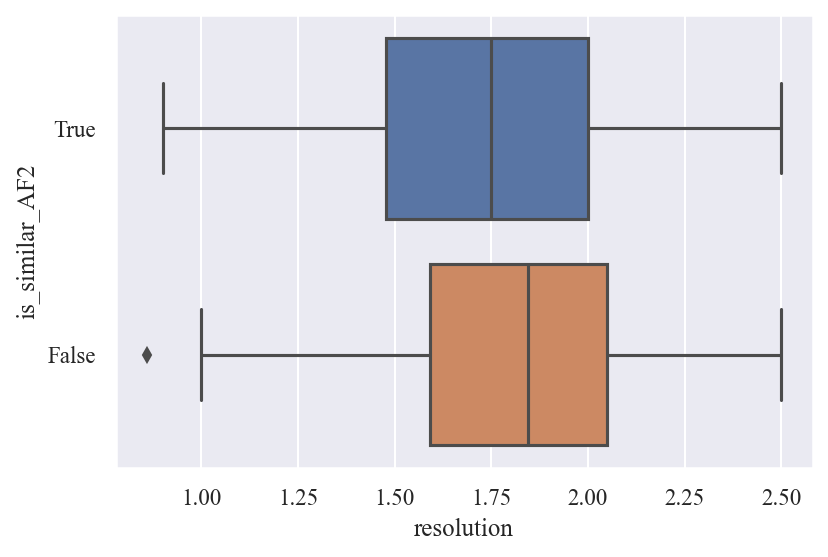

In [8]:
sns.boxplot(data=df, x='resolution', y='is_similar_AF2')

<AxesSubplot:xlabel='is_similar_AF2', ylabel='count'>

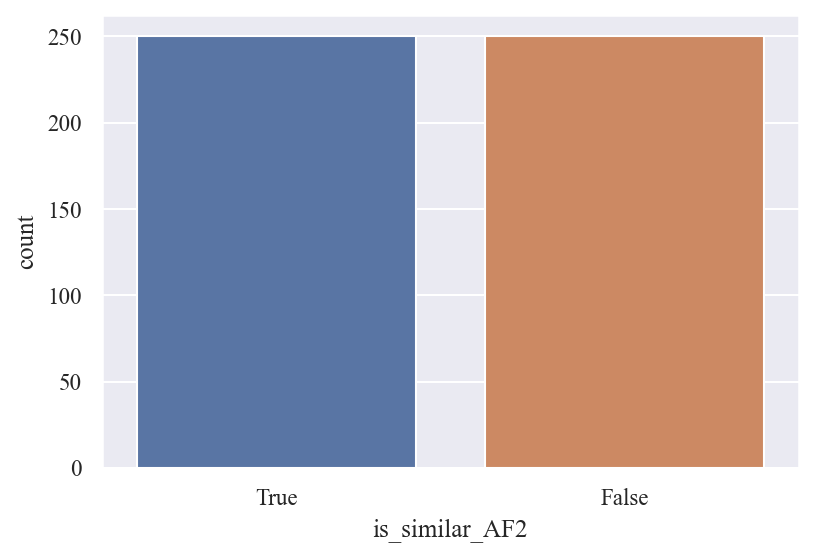

In [9]:
# Target number that have similar sequence to AF2 training dataset and not
sns.countplot(data=df, x='is_similar_AF2')

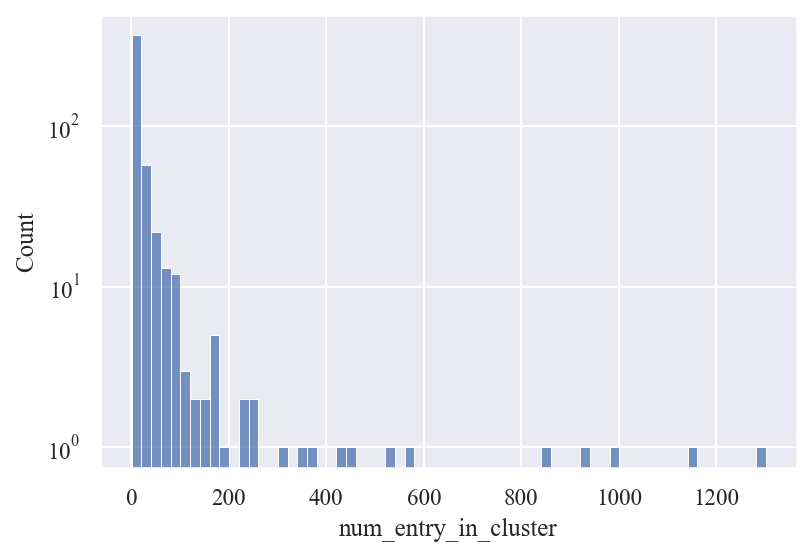

In [10]:
sns.histplot(df['num_entry_in_cluster'], binwidth=20)
plt.yscale('log')

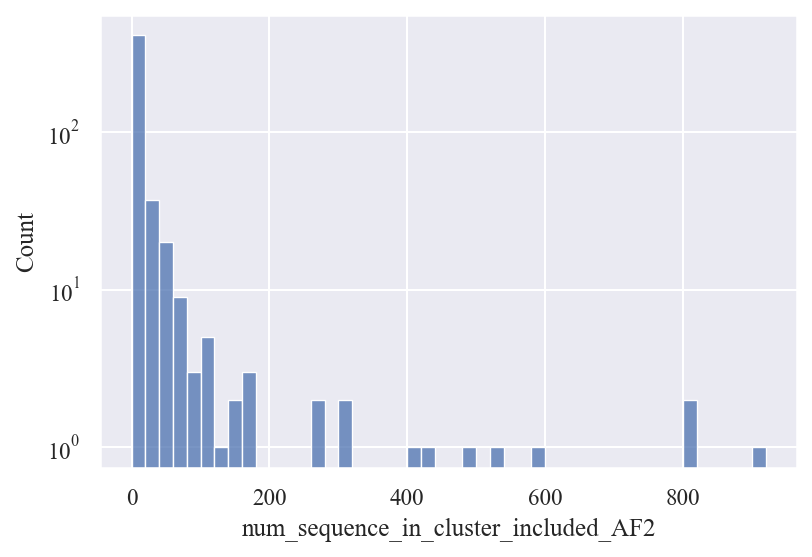

In [11]:
sns.histplot(df['num_sequence_in_cluster_included_AF2'], binwidth=20)
plt.yscale('log')

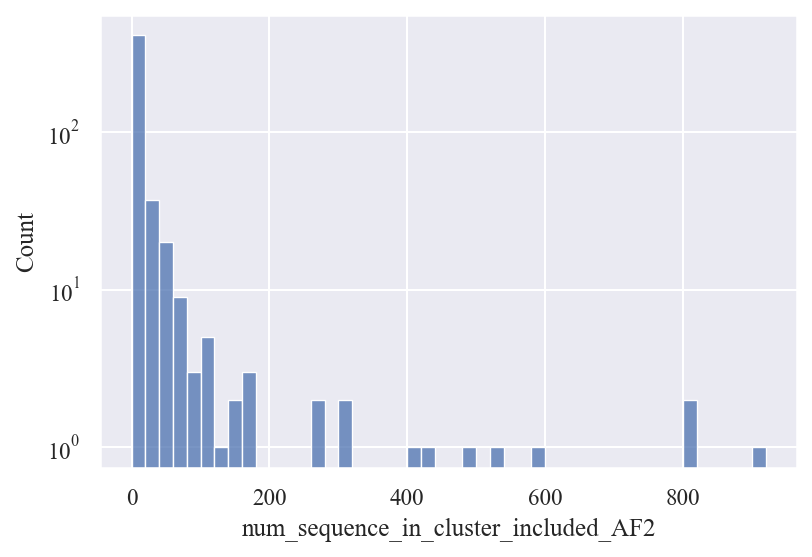

In [12]:
sns.histplot(df['num_sequence_in_cluster_included_AF2'], binwidth=20)
plt.yscale('log')

## Check domain number using CATH definition

In [13]:
domain_num_df = pd.read_csv('../../../../data/interim/cath_domain_num.csv')
domain_num_df

,id,num_domain
0,101M_A,1
1,102L_A,1
2,102M_A,1
3,103L_A,1
4,103M_A,1
...,...,...
357291,9XIA_A,1
357292,9XIM_A,1
357293,9XIM_B,1
357294,9XIM_C,1


In [14]:
pd.merge(df, domain_num_df, on='id', how='inner')

,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2,num_sequence_in_cluster_included_AF2,num_domain
0,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True,85,1
1,5ZHE_A,2.180,2021-03-03T00:00:00Z,">5zhe_A mol:protein length:253 Ditrans,polyci...",MMLSATQPLSEKLPAHGCRHVAIIMDGNGRWAKKQGKIRAFGHKAG...,253,52,2,True,50,1
2,5ZCT_A,2.050,2019-03-27T00:00:00Z,>5zct_A mol:protein length:306 Ribosomal prot...,MKIAILSRDGTLYSCKRLREAAIQRGHLVEILDPLSCYMNINPAAS...,306,11,9,True,2,3
3,6IYB_A,2.096,2020-08-05T00:00:00Z,>6iyb_A mol:protein length:199 Ras-related pr...,GSAMGSTSRKKVLLKVIILGDSGVGKTSLMNQYVNKKFSNQYKATI...,199,20,2,True,18,1
4,6PXX_B,1.500,2019-12-11T00:00:00Z,>6pxx_B mol:protein length:265 Beta-lactamase,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,265,447,130,True,317,1
...,...,...,...,...,...,...,...,...,...,...,...
167,6HRG_A,2.121,2021-07-14T00:00:00Z,>6hrg_A mol:protein length:261 UPF0173 metal-...,MTTVKLTYFGHSAFHVEVDGVGIAIDPWITNPLSKTTLEDYLKNFK...,261,1,1,False,0,1
168,6I9K_A,2.150,2018-07-11T00:00:00Z,>6i9k_A mol:protein length:380 Kumopsin1,MLPHAAKMAARVAGDHDGRNISIVDLLPEDMLPMIHEHWYKFPPME...,380,1,1,False,0,1
169,6HLY_A,1.400,2019-09-04T00:00:00Z,>6hly_A mol:protein length:341 Agropine permease,MGSSHHHHHHSSGLVPRGSHMMADLVISSYGGSFQDAQTKAYFDPY...,341,8,8,False,0,2
170,6CPB_A,1.160,2021-03-03T00:00:00Z,>6cpb_A mol:protein length:141 Carbon monoxid...,MRLTDTNLLEVLNSEEYSGVLKEFREQRYSKKAILYTPNTERNLVF...,141,2,2,False,0,1


## Check domain number using ECOD definition

In [15]:
cath_domain_num_df = pd.read_csv('../../../../data/interim/ecod_domain_num.csv')
cath_domain_num_df

,id,num_domain
0,101M_A,1
1,102L_A,1
2,102M_A,1
3,103L_A,1
4,103M_A,1
...,...,...
548056,9XIA_A,1
548057,9XIM_A,1
548058,9XIM_B,1
548059,9XIM_C,1


In [16]:
merge_df = pd.merge(df, cath_domain_num_df, on='id', how='inner')
merge_df

,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2,num_sequence_in_cluster_included_AF2,num_domain
0,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True,85,1
1,5ZHE_A,2.180,2021-03-03T00:00:00Z,">5zhe_A mol:protein length:253 Ditrans,polyci...",MMLSATQPLSEKLPAHGCRHVAIIMDGNGRWAKKQGKIRAFGHKAG...,253,52,2,True,50,1
2,5ZCT_A,2.050,2019-03-27T00:00:00Z,>5zct_A mol:protein length:306 Ribosomal prot...,MKIAILSRDGTLYSCKRLREAAIQRGHLVEILDPLSCYMNINPAAS...,306,11,9,True,2,2
3,6IYB_A,2.096,2020-08-05T00:00:00Z,>6iyb_A mol:protein length:199 Ras-related pr...,GSAMGSTSRKKVLLKVIILGDSGVGKTSLMNQYVNKKFSNQYKATI...,199,20,2,True,18,1
4,6PXX_B,1.500,2019-12-11T00:00:00Z,>6pxx_B mol:protein length:265 Beta-lactamase,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,265,447,130,True,317,2
...,...,...,...,...,...,...,...,...,...,...,...
457,6W2Q_A,1.800,2021-09-01T00:00:00Z,>6w2q_A mol:protein length:220 Junction 34,MSNDEKEKLKELLKRAEELAKSPDPEDLKEAVRLAEEVVRERPGSE...,220,1,1,False,0,1
458,6CPB_A,1.160,2021-03-03T00:00:00Z,>6cpb_A mol:protein length:141 Carbon monoxid...,MRLTDTNLLEVLNSEEYSGVLKEFREQRYSKKAILYTPNTERNLVF...,141,2,2,False,0,1
459,6X23_A,2.160,2020-01-15T00:00:00Z,>6x23_A mol:protein length:105 mbSHANK1 protein,GPQRNGRAPEGKMDLIIMRGDKGFGFRLSGATHSAAEQTAQGQWVR...,105,1,1,False,0,1
460,6E3A_A,1.400,2018-10-10T00:00:00Z,>6e3a_A mol:protein length:182 Probable RNA 2...,MVLIDYSKLSKEVAYALRHAPWEYGLELDAEGWVDINQLLSSLHEC...,182,1,1,False,0,2


In [17]:
merge_df.value_counts('num_domain')

num_domain
1    333
2    117
3      9
4      3
dtype: int64

In [18]:
no_data_target = list(set(df['id'].unique()) - set(domain_num_df['id'].unique()))
print(no_data_target, len(no_data_target))

['6MCY_A', '6WVH_A', '6D2C_A', '6P28_A', '6U5L_A', '6IJE_B', '6WQM_A', '6SJ8_A', '6T0Q_A', '6LH7_A', '5ZQA_A', '7MGV_A', '7OAJ_D', '6S4C_A', '6H3W_A', '6VTV_A', '7JOF_A', '6E60_A', '6KXT_A', '6NVP_A', '6Z4U_A', '5Z6D_A', '6DGA_A', '5R61_A', '6XHV_1Y', '7EXS_A', '6FSN_A', '7CCE_A', '6WG4_A', '7KJH_C', '6S20_C', '6JFK_A', '6N9H_A', '6CEQ_A', '6XM2_I', '6T5Z_A', '7KCG_A', '6Y0K_AAA', '6XCQ_A', '6LM1_A', '6QSP_B', '6MRN_A', '6JRD_A', '7EHF_A', '5ZMO_A', '5Y30_A', '6VRZ_A', '6UIO_A', '7RVA_C', '6QQM_A', '7NUG_A', '6S0P_A', '6LZZ_A', '6K2F_A', '7NTJ_B', '6DTK_A', '6TM6_A', '6SU3_X', '6TJA_A', '6BA9_A', '6HHM_A', '6LTF_A', '5Y72_A', '5XTT_A', '6LIR_B', '6UBO_A', '6K88_A', '7AKY_A', '6Q1H_C', '6NNW_A', '6RRV_A', '6LCH_A', '7NDY_A', '6P61_A', '6Z4W_A', '6NOP_B', '6XAU_A', '6DHP_u', '6I9C_A', '7C8S_A', '7DVO_A', '6S9T_A', '5Z6V_A', '6UEZ_A', '6L8H_A', '6P20_D', '7LQX_A', '6B9V_A', '6G2V_A', '7CUZ_A', '7BK8_A', '7E5T_A', '7NE2_A', '6LK7_A', '6TNJ_A', '6JD5_A', '6IL7_A', '7KCT_A', '6XOG_A', '7KB2_

In [19]:
df.query('id in @no_data_target')[['id', 'releasedate']].sort_values('releasedate')

,id,releasedate
410,6BS3_B,2018-05-02T00:00:00Z
489,6EDM_A,2018-05-16T00:00:00Z
348,5ZQA_A,2018-05-16T00:00:00Z
256,6DHV_A,2018-05-23T00:00:00Z
174,7OK6_HHH,2018-05-30T00:00:00Z
...,...,...
210,7DG2_C,2021-09-22T00:00:00Z
364,7JOO_C,2021-09-22T00:00:00Z
56,7MQ5_A,2021-09-22T00:00:00Z
28,7LDA_A,2021-09-29T00:00:00Z


In [20]:
cath_domain_num_df.query('id in @no_data_target')

,id,num_domain
311802,5BKA_B,1
354716,5MLP_A,1
362275,5OBY_A,2
362278,5OC0_A,1
368622,5R61_A,1
...,...,...
543760,7NUU_A,2
545229,7OAJ_D,1
545577,7OEZ_A,1
546377,7OK6_HHH,1


## Target whose accuracy difference is over threshold

In [21]:
score_df = pd.read_csv('../../../../data/out/dataset/score/subsets/target_subset_how_eq_random_num_500_seed_0/label.csv', index_col=0)
score_df = pd.merge(score_df, domain_num_df, left_on='Target', right_on='id', how='left')
score_df

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,Seed,Recycle,Ensemble,Target,Num_diff,Num_missing,Length,id,num_domain
0,model_1_ptm_seed_0_rec_10_ens_1,0.981,0.980,0.919,0.910,0.901,0.955,0.900,0.032,model_1_ptm,0,10,1,6AN4_A,0,7,158,6AN4_A,1.000
1,model_1_ptm_seed_0_rec_10_ens_8,0.981,0.979,0.916,0.910,0.901,0.956,0.901,0.019,model_1_ptm,0,10,8,6AN4_A,0,7,158,6AN4_A,1.000
2,model_1_ptm_seed_0_rec_1_ens_1,0.981,0.980,0.917,0.909,0.901,0.944,0.895,20.749,model_1_ptm,0,1,1,6AN4_A,0,7,158,6AN4_A,1.000
3,model_1_ptm_seed_0_rec_1_ens_8,0.980,0.979,0.917,0.910,0.901,0.947,0.896,20.749,model_1_ptm,0,1,8,6AN4_A,0,7,158,6AN4_A,1.000
4,model_1_ptm_seed_0_rec_2_ens_1,0.981,0.979,0.919,0.911,0.903,0.948,0.897,0.172,model_1_ptm,0,2,1,6AN4_A,0,7,158,6AN4_A,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187595,model_5_seed_1_rec_5_ens_1,0.987,0.971,0.873,NaN,NaN,0.964,NaN,0.054,model_5,1,5,1,6R6U_A,0,4,462,NaN,NaN
187596,model_5_seed_1_rec_6_ens_1,0.987,0.971,0.874,NaN,NaN,0.964,NaN,0.045,model_5,1,6,1,6R6U_A,0,4,462,NaN,NaN
187597,model_5_seed_1_rec_7_ens_1,0.987,0.971,0.874,NaN,NaN,0.963,NaN,0.044,model_5,1,7,1,6R6U_A,0,4,462,NaN,NaN
187598,model_5_seed_1_rec_8_ens_1,0.987,0.970,0.874,NaN,NaN,0.964,NaN,0.056,model_5,1,8,1,6R6U_A,0,4,462,NaN,NaN


In [22]:
label = 'GDT_TS'
score_df.query('num_domain == 1').groupby('Target').filter(lambda x: x[label].max() - x[label].min() > 0.05)['Target'].unique().size

27

In [23]:
label = 'GDT_TS'
score_df[~score_df['pTMscore'].isna()].query('num_domain == 1').groupby('Target').filter(lambda x: x[label].max() - x[label].min() > 0.05)['Target'].unique().size

25

In [24]:
targets = score_df[~score_df['pTMscore'].isna()].query('num_domain == 1').groupby('Target').filter(lambda x: x[label].max() - x[label].min() > 0.05)['Target'].unique()

In [25]:
df.query('id in @targets').value_counts('is_similar_AF2')

is_similar_AF2
True     13
False    12
dtype: int64